## Домашнее задание «Статистическая проверка гипотез для связанных выборок. A/B тесты и как их проводить»

In [69]:
import pandas as pd
import scipy.stats as stats
import numpy as np

#### 1. Вам даны результаты проверки двух препаратов. Требуется оценить, есть ли различие в эффекте у этих пациентов.

A - результаты для выборки людей получающих препарат А.

B - результаты для другой выборки людей, получающих препарат B.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CE3CECB070>]],
      dtype=object)

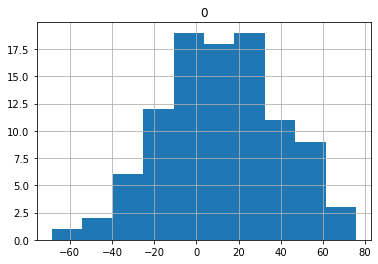

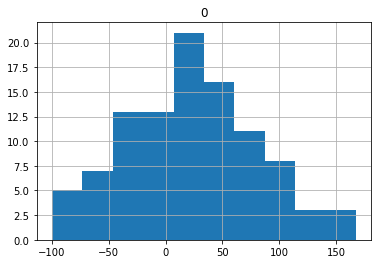

In [74]:
# независимые выборки
np.random.seed(11)
A=stats.norm.rvs(scale=30,loc=11,size=100)
B=A+stats.norm.rvs(scale=54,loc=11,size=100)

pd.DataFrame(A).hist(bins = 10)
pd.DataFrame(B).hist(bins = 10)

In [66]:
# непараметрический тест
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(A, B) # U-тест Манна-Уитни
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=4343.000, p=0.054


In [76]:
# параметрический тест
stats.ttest_ind(A, B, equal_var = False)

Ttest_indResult(statistic=-1.7338006472109972, pvalue=0.08511123469659897)

Оба теста не позволяют отвергнуть нулевую гипотезу о том, что различие в эффекте от двух препаратор имеет статистическую значимость. При этом Mann–Whitney U test позволяет сделать вывод о большей значимости отличий нежели параметрический t-test.

#### 2. Вам даны результаты проверки двух препаратов. Требуется оценить, есть ли различие в эффекте у этих пациентов.

А - те же люди, но без препарата.

B - выборка получающая препарат B

In [77]:
# зависимые выборки
np.random.seed(11)
A=stats.norm.rvs(scale=30,loc=11,size=100)
B=A+stats.norm.rvs(scale=54,loc=11,size=100)

In [78]:
# непараметрический тест
from scipy.stats import wilcoxon
stat, p = wilcoxon(A, B)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=1930.000, p=0.041


In [81]:
# параметрический тест
stats.ttest_rel(A, B)

Ttest_relResult(statistic=-2.1701703735210716, pvalue=0.03238579156467659)

Мы видим, что оба теста дают статистически значимый результат при уровне значимости 0.05. При этом непараметрический Wilcoxon test более консервативен.

#### 3. Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. Используя дисперсионный ананлиз, сделайте выводы о распредлениях результатов. Если ли эффект от удобрения по сравнению с минералкой? 

In [5]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

In [6]:
from scipy.stats import f_oneway

In [7]:
f_oneway(water, nutri, mineral)

F_onewayResult(statistic=12.525963044834192, pvalue=2.9240047906326866e-05)

Промежуточный вывод: дисперсионный анализ показывает, что по крайней мере две группу из трех существенно отличаются друг от друга. Далее необходимо провести попарное сравнение с поправкой на эффект множественных сравнений.

In [58]:
# using Bonferroni correction (adjusted alpha)
alpha = 0.05
n_groups = 3
K = (n_groups * (n_groups - 1)) / 2
a_corr = alpha / K
round(a_corr, 2)

0.02

In [64]:
print(np.mean(water), np.mean(nutri), np.mean(mineral))

2.85 4.666666666666667 2.8095238095238093


In [60]:
# water vs. nutri
stats.ttest_ind(water, nutri)

Ttest_indResult(statistic=-4.132232441883167, pvalue=0.0001840453200503376)

In [61]:
# water vs. mineral
stats.ttest_ind(water, mineral)

Ttest_indResult(statistic=0.10129659201078253, pvalue=0.919834021847144)

In [62]:
# nutri vs. mineral
stats.ttest_ind(nutri, mineral)

Ttest_indResult(statistic=4.257784009579262, pvalue=0.00012136733401245426)

Исходя из проведенных попарных сравнений, при уровне значимости 0.05 (0.02 после корректировки), можно сделать вывод, что эффект nutri статистически значимо отличается, как от water, так и от mineral, при этом сказать, что water и mineral дают статистически различимый эффект мы не можем.

#### 4. Cookie cats

In [8]:
data = pd.read_csv('../data/cookie_cats.csv')
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. 

Переменные:

- userid - уникальный номер, идентифицирующий каждого игрока.
- версия - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).
- sum_gamerounds - количество игровых раундов, сыгранных игроком в течение первой недели после установки
- retention_1 - проигрыватель вернулся и поиграл через 1 день после установки?
- retention_7 - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали gate_30 или gate_40.

In [9]:
# Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


Сформированы две примерно одинаковые выборки `gate_30` и `gate_40`. Далее необходимо будет посчитать retention в каждой из них.

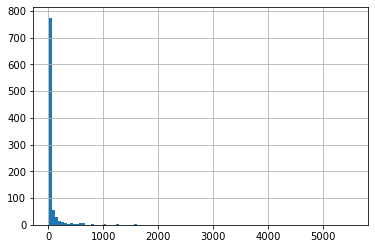

In [10]:
# Подсчет количества игроков для каждого количества раундов
plot_df = data.groupby('sum_gamerounds')['userid'].count()
plot_df.hist(bins = 100)  # попробуйте bins=150

Наибольшее количество игроков сыграли небольшое количество раундов.

Text(0.5, 0, '# Game rounds')

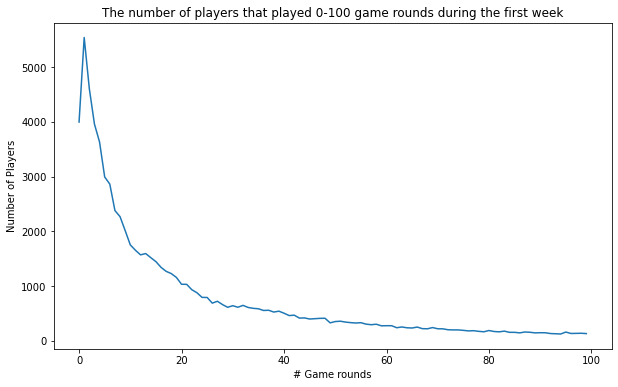

In [11]:
# Построим график распределения игроков, сыгравших от 0 до 100 игровых раундов в течение своей первой недели игры.
%matplotlib inline

ax = plot_df[:100].plot(figsize=(10,6))
ax.set_title("The number of players that played 0-100 game rounds during the first week")
ax.set_ylabel("Number of Players")
ax.set_xlabel('# Game rounds')

Также видим, что наибольшее количество игроков сыграли 2-3 раунда в первую неделю.

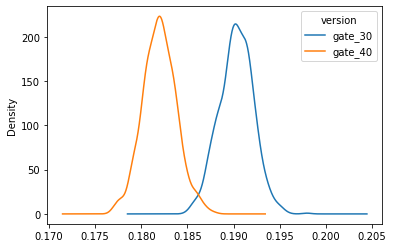

In [12]:
# Creating a list with bootstrapped means for each AB-group
boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1,replace = True).groupby('version')['retention_7'].mean()  #retention_1
    boot_1d.append(boot_mean)
    
# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

**Подготовка данных**.

In [39]:
# splitting data into two samples
data_30 = data[data['version'] == 'gate_30']
data_30 = data_30[['retention_7']]

data_40 = data[data['version'] == 'gate_40']
data_40 = data_40[['retention_7']]

In [50]:
# successes and trials in sample_30
sample_30_success = int(data_30[data_30['retention_7'] == True].count())
sample_30_size = len(data_30)
prop_30 = sample_30_success / sample_30_size

In [51]:
# successes and trials in sample_40
sample_40_success = int(data_40[data_40['retention_7'] == True].count())
sample_40_size = len(data_40)
prop_40 = sample_40_success / sample_40_size

In [52]:
# success proportions
print(prop_30, prop_40)

0.19020134228187918 0.18200004396667327


In [42]:
# creating np.arrays
successes = np.array([sample_30_success, sample_30_size])
samples = np.array([sample_40_success, sample_40_size])

**Используя любой тест для проверки статистической гипотезы, продемонстрируйте наличие эффекта из-за сдвига ворот.**

In [43]:
# using ANOVA
from scipy.stats import f_oneway
f_oneway(data_30, data_40)

F_onewayResult(statistic=array([10.01405708]), pvalue=array([0.00155402]))

In [45]:
# two-sample proportion z-test
from statsmodels.stats.proportion import proportions_ztest
stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')
print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))

z_stat: 36.311, p_value: 0.000


Дисперсионный анализ сравнивал среднее значение в двух группах с воротами, установленными на уровне 30 и 40. P-value ниже 0.05 показывает, что различия в среднем значении в этих двух группах по показателю `retention_7` статистически значимы.

Сравнение среднего двух пропорций в рамках z-test также показывает, что более высокая пропорция `retention_7` ворот на уровне 30 статистически значимо отличается от пропорции `retention_7` ворот на уровне 40.

**Вывод:** установка ворот на уровне 30 статистически обоснована.